<a href="https://colab.research.google.com/github/pateldhruv1672/Diabetic-Retinopathy/blob/main/SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imagecodecs
!pip install gdal
!pip install tensorflow==1.14.0
!pip install keras==2.3.1
!pip install h5py==2.10.0
!pip install imageio==2.6.1

!pip install Keras-Applications==1.0.8
!pip install Keras-Preprocessing==1.1.2
!pip install Markdown==3.1.1
!pip install matplotlib==3.1.1
!pip install numpy==1.15.4
!pip install opencv-python==4.1.1.26
!pip install pandas==0.25.3
!pip install Pillow==5.3.0
!pip install scikit-image==0.16.2
!pip install scikit-learn==0.21.3
!pip install scipy==1.2.1
!pip install six==1.13.0
!pip install sklearn==0.0
!pip install tensorboard==1.14.0
!pip install tensorboard-plugin-wit==1.6.0.post3
!pip install tensorflow-estimator==1.14.0





  Using cached numpy-1.15.4-cp37-cp37m-manylinux1_x86_64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires numpy>=1.16.0, but you have numpy 1.15.4 which is incompatible.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.15.4 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.15.4 which is incompatible.
pywavelets 1.3.0 requires numpy>=1.17.3, but you have numpy 1.15.4 which is incompatible.
pyerfa 2.0.0.1 requires numpy>=1.17, but you have numpy 1.15.4 wh

  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.3 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.25.3 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.13.0 which

In [3]:
import cv2
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from  scipy.misc.pilutil import *
import os 
import imageio
import tensorflow
from osgeo import gdal

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [4]:
from  scipy.misc.pilutil import *

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
%cd/content/drive/My Drive/FinalYearProject/SA/SA-UNet

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/FinalYearProject/SA/SA-UNet


In [6]:
from keras.optimizers import *
from keras.models import Model

from keras.layers import Input,Conv2DTranspose, MaxPooling2D,BatchNormalization,concatenate,Activation


In [7]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, \
    Conv2D, Add, Activation, Lambda,Conv1D


In [16]:
import keras.backend as K

In [9]:
import imagecodecs
data_location = os.getcwd()

training_images_loc = data_location + '/DRIVE/DRIVE/train/images/'
training_label_loc = data_location + '/DRIVE/DRIVE/train/labels/'

validate_images_loc = data_location + '/DRIVE/DRIVE/validate/images/'
validate_label_loc = data_location + '/DRIVE/DRIVE/validate/labels/'
train_files = os.listdir(training_images_loc)
train_data = []
train_label = []
validate_files = os.listdir(validate_images_loc)
validate_data = []
validate_label = []
desired_size = 592
for i in train_files:
    im = imageio.imread(training_images_loc + i)
    label = imageio.imread(training_label_loc + i.split('_')[0] + '_manual1.png',pilmode="L")
    old_size = im.shape[:2]  # old_size is in (height, width) format
    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    color2 = [0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

    new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)

    train_data.append(cv2.resize(new_im, (desired_size, desired_size)))

    temp = cv2.resize(new_label, (desired_size, desired_size))
    _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
    train_label.append(temp)


In [10]:
print (validate_files)
for i in validate_files:
    im = imageio.imread(validate_images_loc + i)
    label = imageio.imread(validate_label_loc + i.split('_')[0] + '_manual1.png',pilmode="L")
    old_size = im.shape[:2]  # old_size is in (height, width) format
    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    color2 = [0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

    new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)

    validate_data.append(cv2.resize(new_im, (desired_size, desired_size)))

    temp = cv2.resize(new_label, (desired_size, desired_size))
    _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
    validate_label.append(temp)



['22_training.tif', '21_training.tif', 'hv23_training.tif', 'v25_training.tif', 'h25_training.tif', 'h26_training.tif', 'v26_training.tif', 'hv24_training.tif', 'randomRotation122_training.tif', 'randomRotation121_training.tif', 'randomRotation223_training.tif', 'randomRotation224_training.tif', 'randomColor027_training.tif', 'randomColor028_training.tif', 'randomColor129_training.tif', 'randomColor130_training.tif', 'randomColor232_training.tif', 'randomGaussian033_training.tif', 'randomGaussian034_training.tif', 'randomColor231_training.tif', 'randomGaussian135_training.tif', 'randomGaussian136_training.tif', 'randomGaussian237_training.tif', 'randomGaussian238_training.tif', 'randomRotation039_training.tif', 'randomRotation040_training.tif']


In [11]:
train_data = np.array(train_data)
train_label = np.array(train_label)

validate_data = np.array(validate_data)
validate_label = np.array(validate_label)


In [12]:
x_train = train_data.astype('float32') / 255.
y_train = train_label.astype('float32') / 255.
x_train = np.reshape(x_train, (
len(x_train), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
y_train = np.reshape(y_train, (len(y_train), desired_size, desired_size, 1))  # adapt this if using `channels_first` im


In [13]:
x_validate = validate_data.astype('float32') / 255.
y_validate = validate_label.astype('float32') / 255.
x_validate = np.reshape(x_validate, (
len(x_validate), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
y_validate = np.reshape(y_validate,
                        (len(y_validate), desired_size, desired_size, 1))  # adapt this if using `channels_first` im



In [14]:
import keras
import keras.backend as K



class DropBlock1D(keras.layers.Layer):
    """See: https://arxiv.org/pdf/1810.12890.pdf"""

    def __init__(self,
                 block_size,
                 keep_prob,
                 sync_channels=False,
                 data_format=None,
                 **kwargs):
        """Initialize the layer.
        :param block_size: Size for each mask block.
        :param keep_prob: Probability of keeping the original feature.
        :param sync_channels: Whether to use the same dropout for all channels.
        :param data_format: 'channels_first' or 'channels_last' (default).
        :param kwargs: Arguments for parent class.
        """
        super(DropBlock1D, self).__init__(**kwargs)
        self.block_size = block_size
        self.keep_prob = keep_prob
        self.sync_channels = sync_channels
        self.data_format = K.normalize_data_format(data_format)
        self.input_spec = keras.engine.base_layer.InputSpec(ndim=3)
        self.supports_masking = True

    def get_config(self):
        config = {'block_size': self.block_size,
                  'keep_prob': self.keep_prob,
                  'sync_channels': self.sync_channels,
                  'data_format': self.data_format}
        base_config = super(DropBlock1D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_mask(self, inputs, mask=None):
        return mask

    def compute_output_shape(self, input_shape):
        return input_shape

    def _get_gamma(self, feature_dim):
        """Get the number of activation units to drop"""
        feature_dim = K.cast(feature_dim, K.floatx())
        block_size = K.constant(self.block_size, dtype=K.floatx())
        return ((1.0 - self.keep_prob) / block_size) * (feature_dim / (feature_dim - block_size + 1.0))

    def _compute_valid_seed_region(self, seq_length):
        positions = K.arange(seq_length)
        half_block_size = self.block_size // 2
        valid_seed_region = K.switch(
            K.all(
                K.stack(
                    [
                        positions >= half_block_size,
                        positions < seq_length - half_block_size,
                    ],
                    axis=-1,
                ),
                axis=-1,
            ),
            K.ones((seq_length,)),
            K.zeros((seq_length,)),
        )
        return K.expand_dims(K.expand_dims(valid_seed_region, axis=0), axis=-1)

    def _compute_drop_mask(self, shape):
        seq_length = shape[1]
        mask = K.random_binomial(shape, p=self._get_gamma(seq_length))
        mask *= self._compute_valid_seed_region(seq_length)
        mask = keras.layers.MaxPool1D(
            pool_size=self.block_size,
            padding='same',
            strides=1,
            data_format='channels_last',
        )(mask)
        return 1.0 - mask

    def call(self, inputs, training=None):

        def dropped_inputs():
            outputs = inputs
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 2, 1])
            shape = K.shape(outputs)
            if self.sync_channels:
                mask = self._compute_drop_mask([shape[0], shape[1], 1])
            else:
                mask = self._compute_drop_mask(shape)
            outputs = outputs * mask *\
                (K.cast(K.prod(shape), dtype=K.floatx()) / K.sum(mask))
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 2, 1])
            return outputs

        return K.in_train_phase(dropped_inputs, inputs, training=training)


class DropBlock2D(keras.layers.Layer):
    """See: https://arxiv.org/pdf/1810.12890.pdf"""

    def __init__(self,
                 block_size,
                 keep_prob,
                 sync_channels=False,
                 data_format=None,
                 **kwargs):
        """Initialize the layer.
        :param block_size: Size for each mask block.
        :param keep_prob: Probability of keeping the original feature.
        :param sync_channels: Whether to use the same dropout for all channels.
        :param data_format: 'channels_first' or 'channels_last' (default).
        :param kwargs: Arguments for parent class.
        """
        super(DropBlock2D, self).__init__(**kwargs)
        self.block_size = block_size
        self.keep_prob = keep_prob
        self.sync_channels = sync_channels
        self.data_format = K.normalize_data_format(data_format)
        self.input_spec = keras.engine.base_layer.InputSpec(ndim=4)
        self.supports_masking = True

    def get_config(self):
        config = {'block_size': self.block_size,
                  'keep_prob': self.keep_prob,
                  'sync_channels': self.sync_channels,
                  'data_format': self.data_format}
        base_config = super(DropBlock2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_mask(self, inputs, mask=None):
        return mask

    def compute_output_shape(self, input_shape):
        return input_shape

    def _get_gamma(self, height, width):
        """Get the number of activation units to drop"""
        height, width = K.cast(height, K.floatx()), K.cast(width, K.floatx())
        block_size = K.constant(self.block_size, dtype=K.floatx())
        return ((1.0 - self.keep_prob) / (block_size ** 2)) *\
               (height * width / ((height - block_size + 1.0) * (width - block_size + 1.0)))

    def _compute_valid_seed_region(self, height, width):
        positions = K.concatenate([
            K.expand_dims(K.tile(K.expand_dims(K.arange(height), axis=1), [1, width]), axis=-1),
            K.expand_dims(K.tile(K.expand_dims(K.arange(width), axis=0), [height, 1]), axis=-1),
        ], axis=-1)
        half_block_size = self.block_size // 2
        valid_seed_region = K.switch(
            K.all(
                K.stack(
                    [
                        positions[:, :, 0] >= half_block_size,
                        positions[:, :, 1] >= half_block_size,
                        positions[:, :, 0] < height - half_block_size,
                        positions[:, :, 1] < width - half_block_size,
                    ],
                    axis=-1,
                ),
                axis=-1,
            ),
            K.ones((height, width)),
            K.zeros((height, width)),
        )
        return K.expand_dims(K.expand_dims(valid_seed_region, axis=0), axis=-1)

    def _compute_drop_mask(self, shape):
        height, width = shape[1], shape[2]
        mask = K.random_binomial(shape, p=self._get_gamma(height, width))
        mask *= self._compute_valid_seed_region(height, width)
        mask = keras.layers.MaxPool2D(
            pool_size=(self.block_size, self.block_size),
            padding='same',
            strides=1,
            data_format='channels_last',
        )(mask)
        return 1.0 - mask

    def call(self, inputs, training=None):

        def dropped_inputs():
            outputs = inputs
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 2, 3, 1])
            shape = K.shape(outputs)
            if self.sync_channels:
                mask = self._compute_drop_mask([shape[0], shape[1], shape[2], 1])
            else:
                mask = self._compute_drop_mask(shape)
            outputs = outputs * mask *\
                (K.cast(K.prod(shape), dtype=K.floatx()) / K.sum(mask))
            if self.data_format == 'channels_first':
                outputs = K.permute_dimensions(outputs, [0, 3, 1, 2])
            return outputs

        return K.in_train_phase(dropped_inputs, inputs, training=training)

In [15]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, \
    Conv2D, Add, Activation, Lambda,Conv1D

#from tensorflow.keras.models import Model
def spatial_attention(input_feature):
    kernel_size = 7

    if K.image_data_format() == "channels_first":
        channel = input_feature._keras_shape[1]
        cbam_feature = Permute((2, 3, 1))(input_feature)
    else:
        channel = input_feature._keras_shape[-1]
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters=1,
                          kernel_size=kernel_size,
                          strides=1,
                          padding='same',
                          activation='sigmoid',
                          kernel_initializer='he_normal',
                          use_bias=False)(concat)
    assert cbam_feature._keras_shape[-1] == 1

    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

    return multiply([input_feature, cbam_feature])


In [16]:
def Backbone(input_size=(512, 512, 3), block_size=7,keep_prob=0.9,start_neurons=16,lr=1e-3):

    inputs = Input(input_size)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(inputs)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1= BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(conv1)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)



    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(pool1)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(conv2)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)


    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(pool2)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(conv3)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)


    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(pool3)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)
    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(convm)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)


    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])

    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])

    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])


    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    output_layer_noActi = Conv2D(1, (1, 1), padding="same", activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)

    model = Model(inputs=inputs, outputs=output_layer)

    model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

    return model
def SA_UNet(input_size=(512, 512, 3), block_size=7,keep_prob=0.9,start_neurons=16,lr=1e-3):

    inputs = Input(input_size)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(inputs)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1= BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(conv1)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)



    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(pool1)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(conv2)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)


    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(pool2)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(conv3)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)


    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(pool3)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)
    convm = spatial_attention(convm)
    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(convm)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)


    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])

    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])

    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])


    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    output_layer_noActi = Conv2D(1, (1, 1), padding="same", activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)

    model = Model(inputs=inputs, outputs=output_layer)

    model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [19]:
TensorBoard(log_dir='./autoencoder', histogram_freq=0,write_graph=True, write_images=True)
model=SA_UNet(input_size=(desired_size,desired_size,3),start_neurons=16,lr=1e-3,keep_prob=0.82,block_size=7)
model.summary()
weight= os.getcwd()+"/Model/DRIVE/SA_UNet.h5"
restore=True


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 592, 592, 3)  0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 592, 592, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
drop_block2d_15 (DropBlock2D)   (None, 592, 592, 16) 0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 592, 592, 16) 64          drop_block2d_15[0][0]            
____________________________________________________________________________________________

In [20]:
TensorBoard(log_dir='/content/autoencoder', histogram_freq=0,
            write_graph=True, write_images=True)



In [21]:
if restore and os.path.isfile(weight):
    model.load_weights(weight)
    print("hello")

model_checkpoint = ModelCheckpoint(weight, monitor='val_accuracy', verbose=1, save_best_only=False)
#print(model_checkpoint)

history=model.fit(x_train, y_train,
                epochs=10, #first  100 with lr=1e-3,,and last 50 with lr=1e-4
                batch_size=5,
                # validation_split=0.05,
                validation_data=(x_validate, y_validate),
                shuffle=True,
                callbacks= [TensorBoard(log_dir='/content/autoencoder'), model_checkpoint])

print(history.history.keys())

# summarize history for accuracy


hello

Train on 234 samples, validate on 26 samples


Epoch 1/10
234/234 [==============================] - 1531s 7s/step - loss: 0.0731 - accuracy: 0.9710 - val_loss: 0.0679 - val_accuracy: 0.9728


Epoch 00001: saving model to /content/drive/MyDrive/FinalYearProject/SA/SA-UNet/Model/DRIVE/SA_UNet.h5
Epoch 2/10
234/234 [==============================] - 1501s 6s/step - loss: 0.0730 - accuracy: 0.9710 - val_loss: 0.0702 - val_accuracy: 0.9722

Epoch 00002: saving model to /content/drive/MyDrive/FinalYearProject/SA/SA-UNet/Model/DRIVE/SA_UNet.h5
Epoch 3/10
234/234 [==============================] - 1496s 6s/step - loss: 0.0726 - accuracy: 0.9711 - val_loss: 0.0784 - val_accuracy: 0.9701

Epoch 00003: saving model to /content/drive/MyDrive/FinalYearProject/SA/SA-UNet/Model/DRIVE/SA_UNet.h5
Epoch 4/10
234/234 [==============================] - 1508s 6s/step - loss: 0.0726 - accuracy: 0.9712 - val_loss: 0.0686 - val_accuracy: 0.9728

Epoch 00004: saving model to /content/drive/MyDrive/Fina

KeyError: ignored

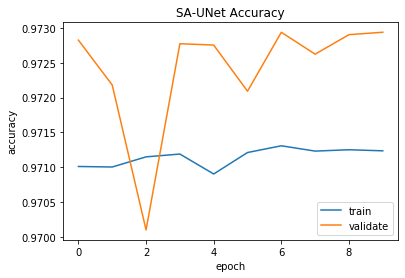

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SA-UNet Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [45]:


!pip install git+https://github.com/jakeret/unet.git
%load_ext tensorboard
import unet
import util

import os
import cv2
import numpy as np
from sklearn.metrics import  recall_score, roc_auc_score, accuracy_score, confusion_matrix
from keras.callbacks import  ModelCheckpoint


from  scipy.misc.pilutil import *
import  math

data_location = ''
testing_images_loc = data_location + 'DRIVE/DRIVE/test/images/'
testing_label_loc = data_location + 'DRIVE/DRIVE/test/labels/'


test_files = os.listdir(testing_images_loc)
test_data = []
test_label = []
desired_size=592
for i in test_files:
    im = imageio.imread(testing_images_loc + i)
    label = imageio.imread(testing_label_loc + i.split('_')[0] + '_manual1.png')
    old_size = im.shape[:2]  # old_size is in (height, width) format
    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    color2 = [0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

    new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)

    test_data.append(cv2.resize(new_im, (desired_size, desired_size)))
    # Change '_manual1.tiff' to the label name
    temp = cv2.resize(new_label, (desired_size, desired_size))
    _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
    test_label.append(temp)
test_data = np.array(test_data)
test_label = np.array(test_label)


x_test = test_data.astype('float32') / 255.

y_test = test_label.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
y_test = np.reshape(y_test, (len(y_test), desired_size, desired_size, 1))  # adapt this if using `channels_first` im
y_test= util.crop_to_shape(y_test,(len(y_test), 584, 565, 1))


model=SA_UNet(input_size=(desired_size,desired_size,3),start_neurons=16,lr=1e-3,keep_prob=1,block_size=1)
model.summary()
weight= data_location + "Model/DRIVE/SA-UNet_200_0.82.h5"

if os.path.isfile(weight): model.load_weights(weight)
model_checkpoint = ModelCheckpoint(weight, monitor='val_acc', verbose=1, save_best_only=True)

y_pred = model.predict(x_test)
y_pred= util.crop_to_shape(y_pred,(20,584,565,1))
y_pred_threshold = []
i=0
for y in y_pred:

    _, temp = cv2.threshold(y, 0.5, 1, cv2.THRESH_BINARY)
    y_pred_threshold.append(temp)
    y = y * 255
    cv2.imwrite( data_location + 'DRIVE/DRIVE/test/results/%d.png' % i, y)
    i+=1
y_test = list(np.ravel(y_test))
y_pred_threshold = list(np.ravel(y_pred_threshold))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

print('Accuracy:', accuracy_score(y_test, y_pred_threshold))

print('Sensitivity:', recall_score(y_test, y_pred_threshold))

print('Specificity:', tn / (tn + fp))

print('NPV:', tn / (tn + fn))
print('PPV', tp / (tp + fp))
print('AUC:', roc_auc_score(y_test, list(np.ravel(y_pred))))
print("F1:",2*tp/(2*tp+fn+fp))
N=tn+tp+fn+fp
S=(tp+fn)/N
P=(tp+fp)/N
print("MCC:",(tp/N-S*P)/math.sqrt(P*S*(1-S)*(1-P)))

  Cloning https://github.com/jakeret/unet.git to /tmp/pip-req-build-vrh6mqyf
  Running command git clone -q https://github.com/jakeret/unet.git /tmp/pip-req-build-vrh6mqyf
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 592, 592, 3)  0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 592, 592, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
drop_block2d_29 (DropBlock2D)   (None, 592, 592, 16) 0           conv2d_33[0][0]                  
____________________________